In [1]:
from cmath import inf
from operator import index
import re
from typing import ChainMap
import numpy as np
import matplotlib.pyplot as plt
from torch import maximum

In [2]:
# def f_xy(x,y):
#     return -2*np.power(x-3,2) - 7*np.power(y-4,2) + x*y - 5

In [3]:
def f_xy(x,y):
    return np.power(x,2)*np.power(y,2)*np.exp(-(np.power(x/13,2)+np.power(y/12,2)) + x*y/250)

In [4]:
def pdf_x(f_xy,x,y):
    delta = 0.00000001

    return (f_xy(x+delta,y) - f_xy(x-delta,y)) / (2*delta)

In [5]:
def pdf_y(f_xy,x,y):
    delta = 0.00000001
    return (f_xy(x,y+delta) - f_xy(x,y-delta)) / (2*delta)

In [6]:
def gradient_vector(f_xy,x,y):
    vector = [pdf_x(f_xy,x,y),pdf_y(f_xy,x,y)]
    return np.array(vector)

In [7]:
X,Y = np.meshgrid(np.linspace(-30,30,1000),np.linspace(-30,30,1000))

I = f_xy(X,Y)
I = I.T

In [8]:
# maximum = -inf,0,0

# for _0 in np.linspace(-10,15,1000):
#     for _1 in np.linspace(-10,15,1000):
#         if f_xy(_0,_1) > maximum[0]:
#             maximum = f_xy(_0,_1),_0,_1

In [9]:
x = 1
y = 1

xl = []
yl = []
hue = []

for _ in range(50):
    vector = gradient_vector(f_xy,x,y)
    amplitude = np.power(vector[0]**2 + vector[1]**2, 1/2)
    dl = 1/amplitude
    x += vector[0]*dl
    y += vector[1]*dl

    xl.append(x)
    yl.append(y)

levels = np.arange(400,7000,6600/15)

<a list of 38 text.Text objects>

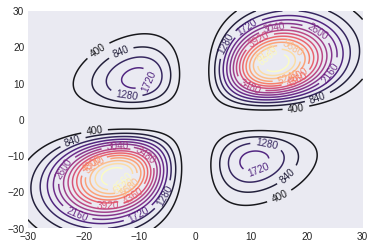

In [10]:
# extent = (-15, 20, -15, 20)
plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
CS = ax.contour(np.linspace(-30,30,1000), np.linspace(-30,30,1000), I,levels=levels, alpha=0.9, cmap='magma')
# ax.imshow(I, extent=extent, cmap='hot', alpha=0.7)
ax.clabel(CS, inline=True, fontsize=10)
# ax.scatter(xl[::2],yl[::2],color='#07073f',alpha=0.5,marker='.')